<a href="https://colab.research.google.com/github/arunuday117/LGMVIP-DataScience/blob/main/Task_4_Prediction_using_Decision_Tree_Algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Lets Grow More**
**Task 4**

**Name : Arun Uday**

**Data Science Internship**

**Prediction using Decision Tree Algorithm**

**Dataset**: https://bit.ly/3kXTdox

## **Importing Libraries**

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

**Importing Dataset**

In [4]:
dataset=pd.read_csv("Iris.csv")

**Displaying first 5 rows in the dataset using head()**

In [5]:
dataset.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


**Displaying last 5 rows using tail()**

In [6]:
dataset.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


**shape is used to display the number of columns and rows**

In [7]:
dataset.shape

(150, 6)

**Now using the isnull() to see if there is any null value in the dataset**

In [8]:
dataset.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


**describe() displays the statistical aspects of the dataset**

In [10]:
dataset.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


**Now using the columns we can display the column names of the dataset**

In [11]:
dataset.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

# **Plotting the data**

**Correlations of the dataset**

In [12]:
dataset.corr()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,1.000000,0.716676,-0.397729,0.882747,0.899759
SepalLengthCm,0.716676,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.899759,0.817954,-0.356544,0.962757,1.000000


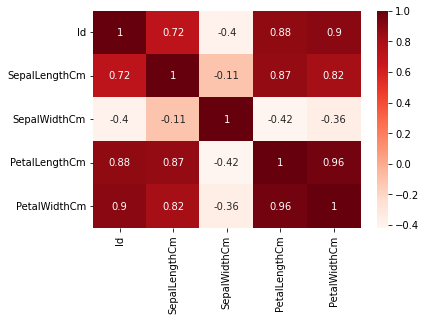

In [13]:
sns.heatmap(dataset.corr(), cmap='Reds', annot=True)

**Using box plot**

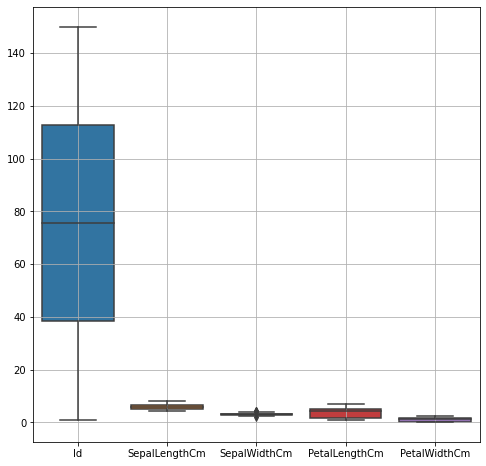

In [14]:
plt.figure(figsize=(8,8))
sns.boxplot(data=dataset)
plt.grid()

**Label Encoder**

In [15]:
from sklearn.preprocessing import LabelEncoder

In [16]:
label=LabelEncoder()
dataset1=dataset.copy()
dataset1["Species"]=label.fit_transform(dataset1["Species"])
dataset1

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,2
146,147,6.3,2.5,5.0,1.9,2
147,148,6.5,3.0,5.2,2.0,2
148,149,6.2,3.4,5.4,2.3,2


In [17]:
x=dataset1.drop(columns=["Species"],axis=1)
y=dataset1['Species']

**Training and testing**

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.6)

In [20]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

In [21]:
model = DecisionTreeClassifier()
model.fit(x_train, y_train)

DecisionTreeClassifier()

In [22]:
y_pred = model.predict(x_test)
print(y_pred[0:10])

[0 2 0 1 1 1 1 1 0 1]


**Classification Report**

In [23]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        28
           1       1.00      1.00      1.00        36
           2       1.00      1.00      1.00        26

    accuracy                           1.00        90
   macro avg       1.00      1.00      1.00        90
weighted avg       1.00      1.00      1.00        90



**Visualization of trained model by using plot_tree**

In [24]:
from sklearn.tree import plot_tree

[Text(535.6800000000001, 453.0, 'Id <= 100.5\ngini = 0.651\nsamples = 60\nvalue = [22, 14, 24]'),
 Text(357.12, 271.8, 'Id <= 50.5\ngini = 0.475\nsamples = 36\nvalue = [22, 14, 0]'),
 Text(178.56, 90.59999999999997, 'gini = 0.0\nsamples = 22\nvalue = [22, 0, 0]'),
 Text(535.6800000000001, 90.59999999999997, 'gini = 0.0\nsamples = 14\nvalue = [0, 14, 0]'),
 Text(714.24, 271.8, 'gini = 0.0\nsamples = 24\nvalue = [0, 0, 24]')]

<Figure size 10800x10800 with 0 Axes>

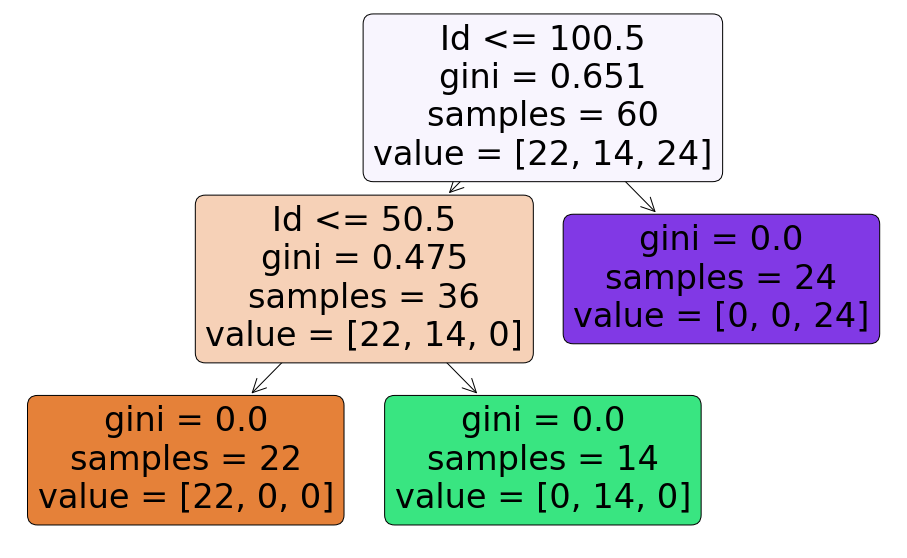

In [25]:
plt.figure(figsize=(150,150))
plt.figure(figsize=(16,10))
plot_tree(model,feature_names=dataset.columns[:-1],rounded=True,filled=True)

**Evaluation of the model**

In [26]:
train_score= str(model.score(x_train, y_train) * 100)
test_score= str(model.score(x_test, y_test) * 100)
print(f'Train Score : {train_score[:5]}%\nTest Score : {test_score[:5]}%')

Train Score : 100.0%
Test Score : 100.0%


#**Thank You**